# Word Mover's Distance basics

https://markroxor.github.io/gensim/static/notebooks/WMD_tutorial.html#targetText=Word%20Mover's%20Distance%20basics,4%5D%20vector%20embeddings%20of%20words.

WMD is a method that allows us to assess the "distance" between two documents in a meaningful way, even when they have no words in common.

outperform many of the state-of-the-art methods in k-nearest neighbors classification

The sentences have no words in common, but by matching the relevant words, WMD is able to accurately measure the (dis)similarity between the two sentences. The method also uses the bag-of-words representation of the documents (simply put, the word's frequencies in the documents), noted as  d  in the figure below. The intution behind the method is that we find the minimum "traveling distance" between documents, in other words the most efficient way to "move" the distribution of document 1 to the distribution of document 2 (image below)

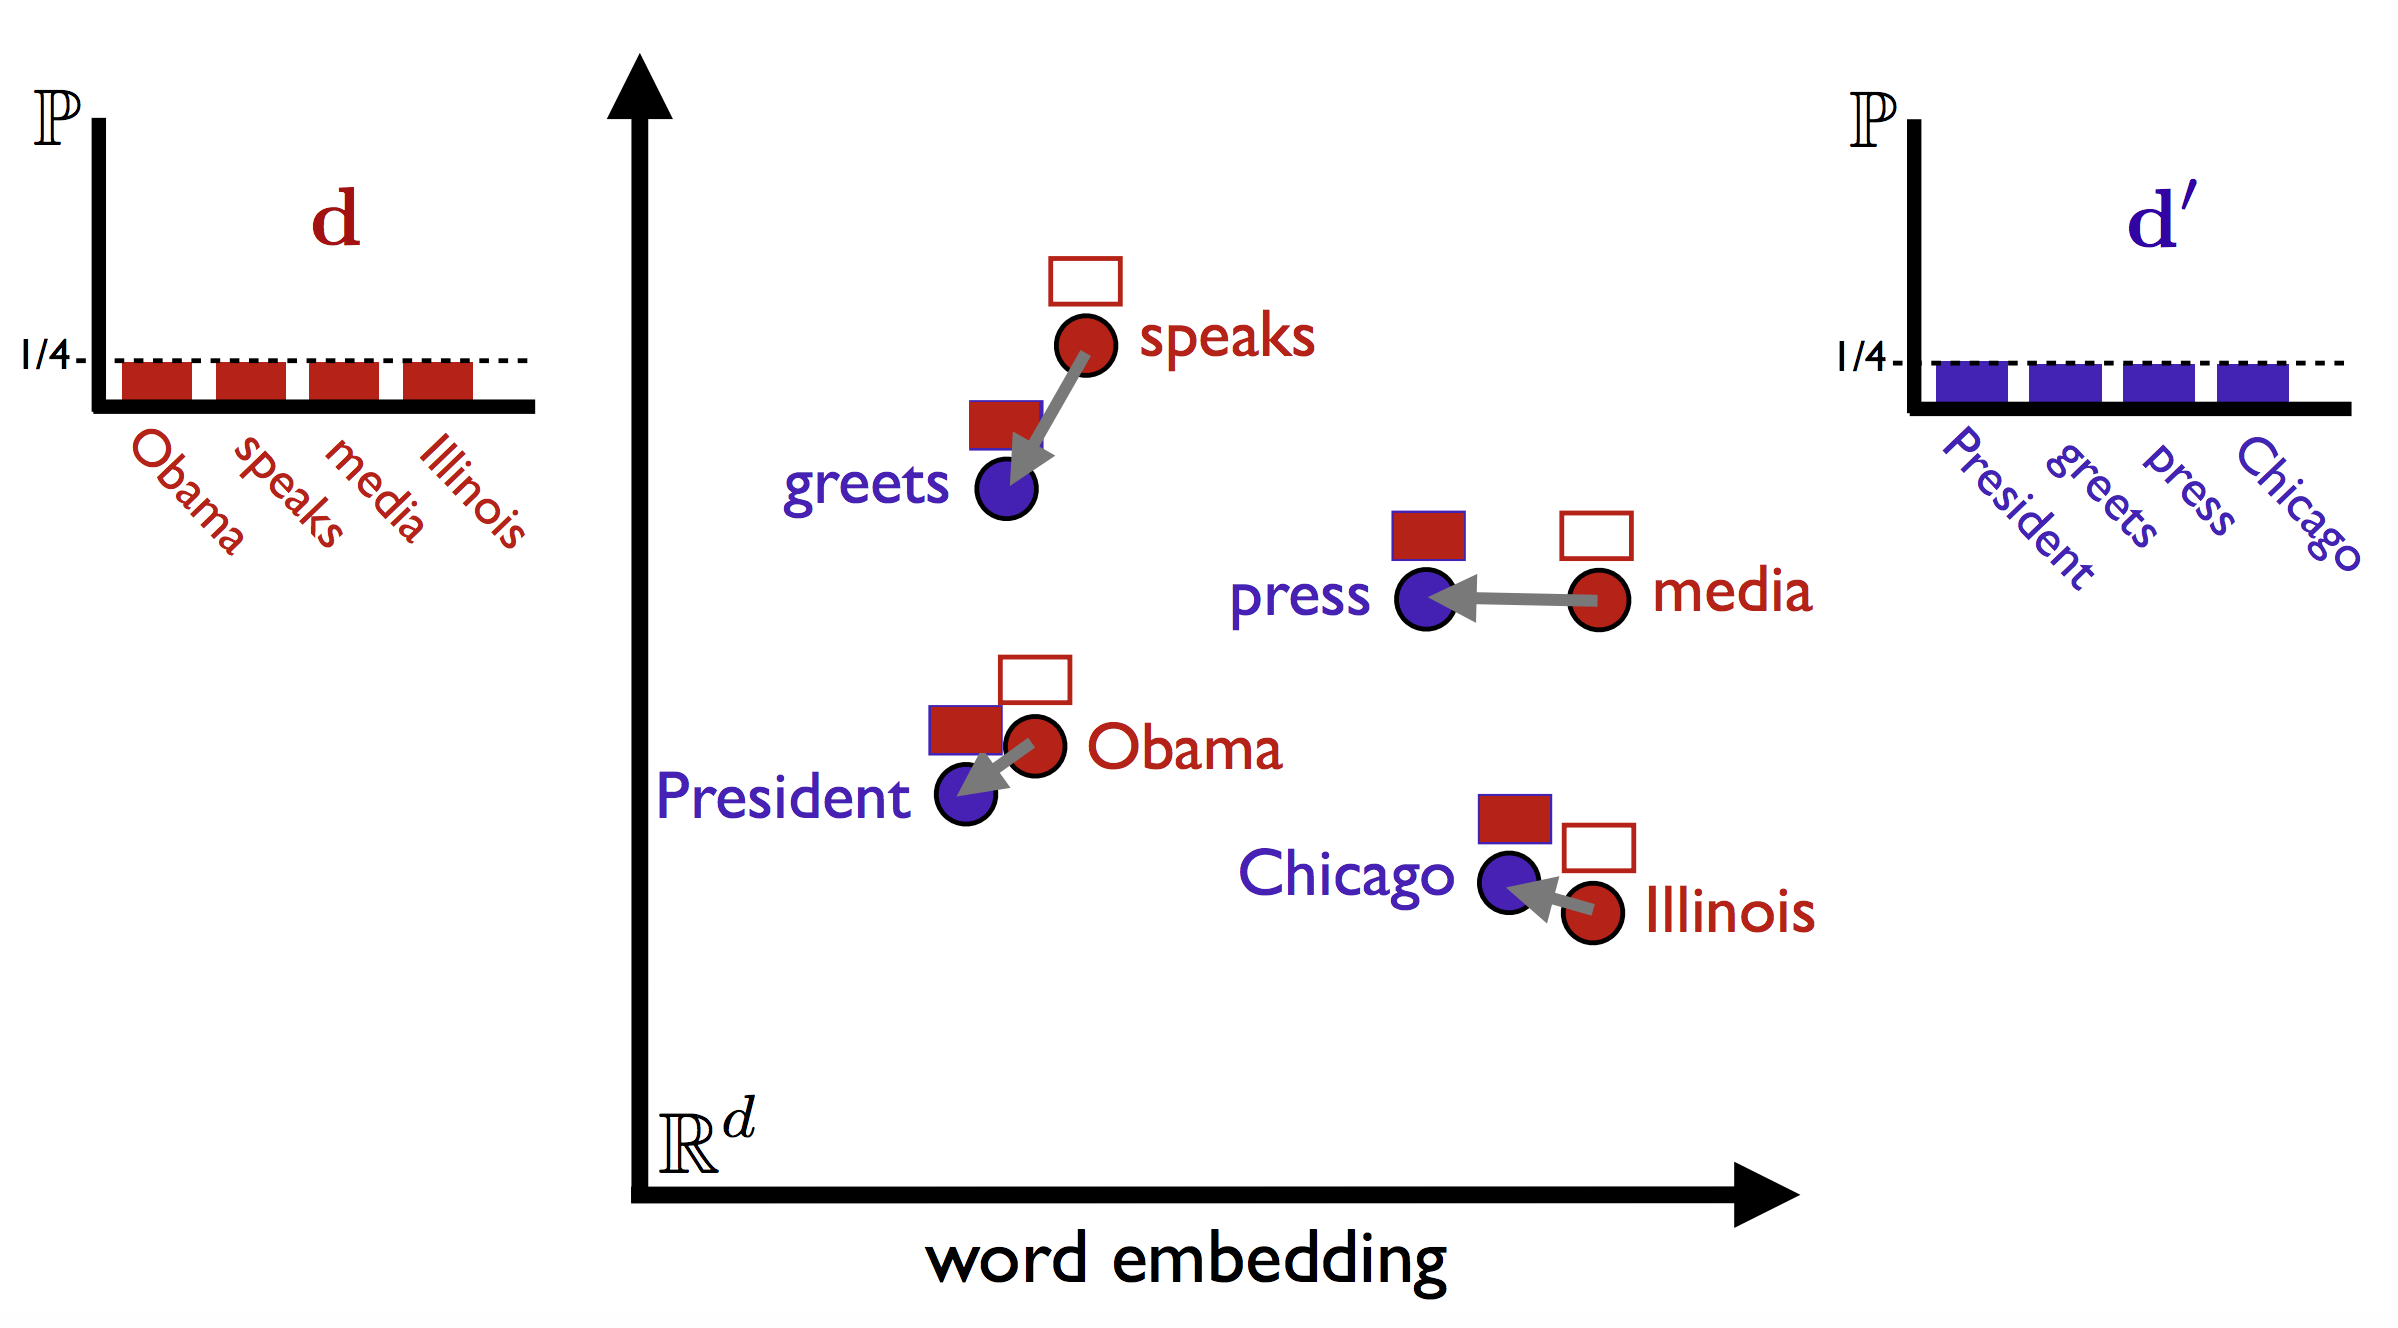

# Part 1: Computing the Word Mover's Distance

Let's take some sentences to compute the distance between.



In [2]:
# Initialize logging.
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')

sentence_obama = 'Obama speaks to the media in Illinois'
sentence_president = 'The president greets the press in Chicago'
sentence_obama = sentence_obama.lower().split()
sentence_president = sentence_president.lower().split()

These sentences have very similar content, and as such the WMD should be low. Before we compute the WMD, we want to remove stopwords ("the", "to", etc.), as these do not contribute a lot to the information in the sentences.


In [3]:
# Import and download stopwords from NLTK.
from nltk.corpus import stopwords
from nltk import download
download('stopwords')  # Download stopwords list.

# Remove stopwords.
stop_words = stopwords.words('english')
sentence_obama = [w for w in sentence_obama if w not in stop_words]
sentence_president = [w for w in sentence_president if w not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CAMNG3\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will be using some downloaded pre-trained embeddings. We load these into a Gensim Word2Vec model class. Note that the embeddings we have chosen here require a lot of memory.m

In [4]:
import gensim

In [5]:
model = gensim.models.KeyedVectors.load_word2vec_format("./GoogleNews-vectors-negative300.bin.gz", binary=True)

In [6]:
sentence_obama

['obama', 'speaks', 'media', 'illinois']

In [7]:
sentence_president

['president', 'greets', 'press', 'chicago']

In [10]:
distance = model.wmdistance(sentence_president,sentence_obama)
print('distance = {0:.3f}'.format(distance))

distance = 3.374


In [24]:
distance = model.wmdistance(['sun','shining'],['moon','fruit','orange'])
print('distance = {0:.3f}'.format(distance))

distance = 3.678


Normalizing word2vec vectors

When using the wmdistance method, it is beneficial to normalize the word2vec vectors first, so they all have equal length. To do this, simply call model.init_sims(replace=True) and Gensim will take care of that for you.

In [25]:
model.init_sims(replace=True)  # Normalizes the vectors in the word2vec class.

distance = model.wmdistance(sentence_obama, sentence_president)  # Compute WMD as normal.


In [26]:
print('distance = {0:.3f}'.format(distance))

distance = 1.017


# Part 2: Similarity queries using WmdSimilarity

You can use WMD to get the most similar documents to a query, using the WmdSimilarity class

Let's try similarity queries using some real world data. For that we'll be using Yelp reviews, available at http://www.yelp.com/dataset_challenge. Specifically, we will be using reviews of a single restaurant, namely the Mon Ami Gabi.



This time around, we are going to train the Word2Vec embeddings on the data ourselves. One restaurant is not enough to train Word2Vec properly, so we use 6 restaurants for that, but only run queries against one of them. In addition to the Mon Ami Gabi, mentioned above, we will be using:

--Earl of Sandwich.

--Wicked Spoon.

--Serendipity 3.

--Bacchanal Buffet.

--The Buffet.

In [28]:
# Pre-processing a document.

from nltk import word_tokenize
download('punkt')  # Download data for tokenizer.

def preprocess(doc):
    doc = doc.lower()  # Lower the text.
    doc = word_tokenize(doc)  # Split into words.
    doc = [w for w in doc if not w in stop_words]  # Remove stopwords.
    doc = [w for w in doc if w.isalpha()]  # Remove numbers and punctuation.
    return doc

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CAMNG3\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


# To get name of restaurtants (ids)

--------------------------------------------------------------------------------------------------------------------------------

In [65]:
idss[:3]

['ujmEBvifdJM6h6RLv4wQIg', 'NZnhc2sEQy3RmzKTZnqtwQ', 'WTqjgwHlXbSFevF32_DJVw']

In [66]:
from collections import Counter 
l = list(zip(idss,Counter(idss).values()))
sorted(l, key=lambda x : x[1],reverse=True)

[('yNVcnSaMSrTmjJBMrHTy9w', 8570),
 ('iNbAht5CVY4KH_cympbHMA', 8568),
 ('WSAN2er3DhaZ8ybNStxCbw', 6887),
 ('Wxxvi3LZbHNIDwJ-ZimtnA', 5847),
 ('-Oj_rs84KRFOTtbeQXPB7Q', 5575),
 ('qBZuI7didMgfaGu5H0J7jw', 5206),
 ('jwHtNvHBPafiAwM92jM8yA', 4534),
 ('r5PLDU-4mSbde5XekTXSCA', 4522),
 ('5qG4UHurI1yEozwn25WAFw', 4351),
 ('PuB-oSX_fMh0822kChScrA', 4350),
 ('jScBTQtdAt-8RshaiBEHgw', 4318),
 ('Hh4qRAOswrmBNWt3wPn8rw', 4240),
 ('r5PLDU-4mSbde5XekTXSCA', 4131),
 ('XXW_OFaYQkkGOGniujZFHg', 4093),
 ('yGMCl0vYigshkXiZFIDTNw', 4014),
 ('9UTpmQ4OhX5jNFUIu7dPPQ', 4006),
 ('lDdKtMTBfE6vxAQ58NosFw', 3710),
 ('CtYWpX_cy1YdZgoKtS0Tqg', 3662),
 ('eriW9d0AXkQyLrX5W3p_Pw', 3642),
 ('7EZ4Eu7YJ1ltRCC5jXFJrQ', 3579),
 ('VdlPZg2NAu8t8GkdbPLecg', 3575),
 ('c8M0snWaVUIw9ct_r9a7vw', 3554),
 ('A3TwvPrV-2tro0BQTjpePQ', 3494),
 ('X5uxdU9GHoUAqo2wmbg3OQ', 3366),
 ('7Qc_9jtmw5-vIJmx-g8deA', 3350),
 ('0P9PCKJBC3TY9Ifcw4Y7Mw', 3339),
 ('_iUlt5rm-15QoLw0MEEg5A', 3330),
 ('o5Mofj5KJkYAMs_fhxftpg', 3305),
 ('E1oljAejCOeW53XdU

In [78]:
import json

# Business IDs of the restaurants.
ids = ['lDdKtMTBfE6vxAQ58NosFw', 'CtYWpX_cy1YdZgoKtS0Tqg', 'eriW9d0AXkQyLrX5W3p_Pw',
       '_iUlt5rm-15QoLw0MEEg5A', 'VdlPZg2NAu8t8GkdbPLecg', '0P9PCKJBC3TY9Ifcw4Y7Mw',
       'yNPh5SO-7wr8HPpVCDPbXQ','Somjllgzu0BxzsSck9V2wQ','iNbAht5CVY4KH_cympbHMA',
       '-Oj_rs84KRFOTtbeQXPB7Q','qBZuI7didMgfaGu5H0J7jw','jwHtNvHBPafiAwM92jM8yA']

idss = []

w2v_corpus = []  # Documents to train word2vec on (all 6 restaurants).
wmd_corpus = []  # Documents to run queries against (only one restaurant).
documents = []  # wmd_corpus, with no pre-processing (so we can see the original documents).
with open('review.json', encoding='utf8') as data_file:
    for line in data_file:
        json_line = json.loads(line)
        idss.append(json_line['business_id'])
        
        if json_line['business_id'] not in ids:
            # Not one of the 6 restaurants.
            continue
        
        # Pre-process document.
        text = json_line['text']  # Extract text from JSON object.
        text = preprocess(text)
        
        # Add to corpus for training Word2Vec.
        w2v_corpus.append(text)
        
        if json_line['business_id'] == ids[0]:
            # Add to corpus for similarity queries.
            wmd_corpus.append(text)
            documents.append(json_line['text'])

In [79]:
len(w2v_corpus)

2738

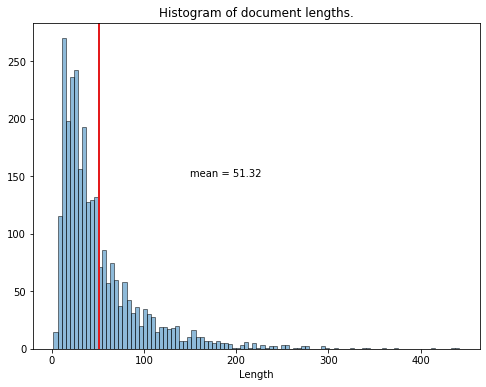

In [113]:
from matplotlib import pyplot as plt
%matplotlib inline

# Document lengths.
lens = [len(doc) for doc in w2v_corpus]

# Plot.
plt.rc('figure', figsize=(8,6))
plt.rc('lines', linewidth=2)
# Histogram.
plt.hist(lens, bins=100,alpha=0.5, histtype='bar', ec='black')
plt.axvline(avg_len, color='#e41a1c')
# Average length.
avg_len = sum(lens) / float(len(lens))

plt.title('Histogram of document lengths.')
plt.xlabel('Length')
plt.text(150, 150, 'mean = %.2f' % avg_len)
plt.show()

Now we want to initialize the similarity class with a corpus and a word2vec model (which provides the embeddings and the wmdistance method itself).

In [115]:
from gensim.models import Word2Vec
# Train Word2Vec on all the restaurants.
model = Word2Vec(w2v_corpus, workers=-1, size=100)

# Initialize WmdSimilarity.
from gensim.similarities import WmdSimilarity
num_best = 10
instance = WmdSimilarity(wmd_corpus, model, num_best=10)

2019-10-29 16:01:07,821 : WARNING : EPOCH - 1 : supplied example count (0) did not equal expected count (2738)
2019-10-29 16:01:07,822 : WARNING : EPOCH - 1 : supplied raw word count (0) did not equal expected count (140518)
2019-10-29 16:01:07,825 : WARNING : EPOCH - 2 : supplied example count (0) did not equal expected count (2738)
2019-10-29 16:01:07,826 : WARNING : EPOCH - 2 : supplied raw word count (0) did not equal expected count (140518)
2019-10-29 16:01:07,829 : WARNING : EPOCH - 3 : supplied example count (0) did not equal expected count (2738)
2019-10-29 16:01:07,830 : WARNING : EPOCH - 3 : supplied raw word count (0) did not equal expected count (140518)
2019-10-29 16:01:07,834 : WARNING : EPOCH - 4 : supplied example count (0) did not equal expected count (2738)
2019-10-29 16:01:07,835 : WARNING : EPOCH - 4 : supplied raw word count (0) did not equal expected count (140518)
2019-10-29 16:01:07,838 : WARNING : EPOCH - 5 : supplied example count (0) did not equal expected co

The num_best parameter decides how many results the queries return. Now let's try making a query. The output is a list of indeces and similarities of documents in the corpus, sorted by similarity.

Note that the output format is slightly different when num_best is None (i.e. not assigned). In this case, you get an array of similarities, corresponding to each of the documents in the corpus.

The query below is taken directly from one of the reviews in the corpus. Let's see if there are other reviews that are similar to this one.

In [134]:
sent = 'Stood up two days in a row!! '
query = preprocess(sent)
model.init_sims(replace=False)  # Normalizes the vectors in the word2vec class.
sims = instance[query] 

In [135]:
sims

[(9, 0.49364400733600716),
 (6, 0.42846425993449444),
 (4, 0.4276722841168528),
 (2, 0.42691327157204434),
 (5, 0.4268534091532204),
 (3, 0.4266575416534604),
 (8, 0.4263679047317464),
 (7, 0.4262793542182777),
 (0, 0.4260183403721374),
 (1, 0.42531024782162413)]

In [136]:
# Print the query and the retrieved documents, together with their similarities.
print ('Query:')
print (sent)
for i in range(num_best):
    print ('sim = %.4f' % sims[i][1])
    print (documents[sims[i][0]])

Query:
Stood up two days in a row!! 
sim = 0.4936
Stood up two days in a row!!  Excuse first day is they didn't see my info.  Scheduled second day for a 12-1 appt.  Even texted my info!  No phone calls or text as to why they weren't showing!
sim = 0.4285
Journey Electric by far is one of the best Electrical Companies I have ever had the pleasure of doing business with. They are extremely accommodating by getting the job done on your schedule. Including the weekends. They even allow you to buy the materials if you choose. What's even more amazing is I was having trouble getting the materials at home depot with the sales associate and Greg came to the Home Depot location to help get the materials on a Friday night at 8pm. Friday night at 8pm!!! I have never seen a more accomodating company in all my life. Their service goes way above and beyond of that of a normal company. I never expected such great service. They got the job done on time and at a very fair and reasonable price. I will n